In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.cross_validation import train_test_split

%matplotlib inline

In [84]:
df = pd.read_csv('MOVIESDF.csv')

In [85]:
df.info()
df['Production'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4215 entries, 0 to 4214
Data columns (total 39 columns):
Unnamed: 0           4215 non-null int64
Unnamed: 0.1         4215 non-null int64
Actors               4208 non-null object
Awards               3537 non-null object
BoxOffice            800 non-null object
Country              4213 non-null object
DVD                  4065 non-null object
Director             4168 non-null object
Genre                4212 non-null object
Language             4209 non-null object
Metascore            2782 non-null float64
Plot                 4199 non-null object
Poster               3612 non-null object
Production           4049 non-null object
Rated                4160 non-null object
Released             4206 non-null object
Response             4215 non-null bool
Runtime              4201 non-null object
Title                4215 non-null object
Type                 4215 non-null object
Website              2181 non-null object
Writer         

array(['Waner Bros.', 'Sony Pictures', 'Walt Disney Pictures',
       'Buena Vista', 'Buena Vista Pictures', 'MGM', 'Fox Searchlight',
       '20th Century Fox', 'MGM/Dimension', 'New Line Cinema',
       'Warner Bros.', 'MCA Universal Home Video', 'Live Home Video',
       'Paramount Pictures', nan, 'Sony Pictures/Columbia',
       'Sony/Columbia Pictures', 'Universal Pictures',
       'Touchstone Pictures', 'Columbia Pictures', 'Fox Atomic',
       'HBO Video', 'Universal Pictures Distributio',
       'Warner Bros. Pictures', 'Big Pictures',
       'Sony Pictures Home Entertainment', 'MGM Home Entertainment',
       'Miramax Films', 'Summit Entertainment', 'Universal',
       'Sony Pictures Entertainment', 'Focus Features', 'Lionsgate Films',
       'Warner Home Video', 'New Line Home Entertainment',
       '20th Century Fox Film Corporat', 'Sony',
       'Lorimar Film Entertainment', 'Relativity Media',
       'The Weinstein Company', 'Paramount Home Video', 'Lionsgate',
       'Twe

In [86]:
df['Rated'].head()

0        R
1    PG-13
2       PG
3        G
4        G
Name: Rated, dtype: object

In [87]:
df2 = df[['imdbRating', 'tomatoFresh', 'tomatoMeter', 'tomatoRating','tomatoRotten', 'tomatoUserReviews', 'tomatoUserMeter','Rated','Production', 'Gross Adj Profit']]

In [88]:
df2 = df2.dropna(how = 'any')

In [89]:
df2['Gross_Adj_Profit'] = df2['Gross Adj Profit'].str.replace("$", "").str.replace(",", "").astype(float)
df2 = df2.drop("Gross Adj Profit", axis = 1)
df2['Gross_Adj_Profit'] = df2['Gross_Adj_Profit']/1000000

In [90]:
df2['G_rating'] = (df2['Rated'] == 'G').astype(int)
df2['PG_rating'] = (df2['Rated'] == 'PG').astype(int)
df2['PG_13_rating'] = (df2['Rated'] == 'PG-13').astype(int)

In [91]:
df2['20_Century'] = (df2['Production'].apply(lambda x: '20th Century' in x)).astype(int)
df2['Columbia'] = (df2['Production'].apply(lambda x: ('Columbia' in x) or ('Sony' in x))).astype(int)
df2['MGM'] = (df2['Production'].apply(lambda x: 'MGM' in x)).astype(int)
df2['Paramount'] = (df2['Production'].apply(lambda x: 'Paramount' in x)).astype(int)
df2['UnitedArtists'] = (df2['Production'].apply(lambda x: 'United Artists' in x)).astype(int)
df2['Universal'] = (df2['Production'].apply(lambda x: 'Universal' in x)).astype(int)
df2['Warner'] = (df2['Production'].apply(lambda x: 'warner' in x.lower())).astype(int)

In [92]:
df2.head()

,imdbRating,tomatoFresh,tomatoMeter,tomatoRating,tomatoRotten,tomatoUserReviews,tomatoUserMeter,Rated,Production,Gross_Adj_Profit,G_rating,PG_rating,PG_13_rating,20_Century,Columbia,MGM,Paramount,UnitedArtists,Universal,Warner
0,6.0,15.0,71.0,6.4,6.0,14613.0,54.0,R,Waner Bros.,258.3009,0,0,0,0,0,0,0,0,0,0
1,4.9,21.0,11.0,3.9,170.0,121303.0,36.0,PG-13,Sony Pictures,62.5443,0,0,1,0,1,0,0,0,0,0
2,7.3,89.0,68.0,6.2,41.0,32088.0,81.0,PG,Walt Disney Pictures,58.0703,0,1,0,0,0,0,0,0,0,0
3,7.2,44.0,98.0,8.1,1.0,708348.0,75.0,G,Buena Vista,487.1189,1,0,0,0,0,0,0,0,0,0
4,4.8,28.0,31.0,4.4,62.0,406385.0,32.0,G,Buena Vista Pictures,106.6515,1,0,0,0,0,0,0,0,0,0


(array([   1.,    1.,    2.,    2.,    1.,    4.,    3.,    4.,    6.,
           9.,   11.,   30.,   19.,   25.,   43.,   50.,   75.,  153.,
         209.,  122.,   90.,  214.,  121.,  229.,  294.,  359.,  236.,
         171.,  183.,  143.,  218.,  204.,  206.,  187.,   85.,   71.,
          70.,   15.,    8.,    5.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,   39.]),
 array([  4.20469262,   4.46846504,   4.73223745,   4.99600987,
          5.25978228,   5.5235547 ,   5.78732711,   6.05109953,
          6.31487195,   6.57864436,   6.84241678,   7.10618919,
          7.36996161,   7.63373403,   7.89750644,   8.16127886,
          8.42505127,   8.68882369,   8.95259611,   9.21636852,
          9.48014094,   9.74391335,  10.00768577,  10.27145818,
         10.5352306 ,  10.79900302,  11.06277543,  11.32654785,
         11.59032026,  11.85409268,  12.1178651 ,  12.38163751,
         12.64540993,  12.90918234,  13.17295476,  13.43672717,
         13.70049959,  1

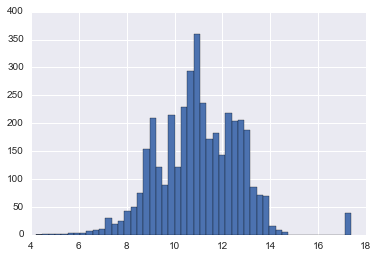

In [10]:
plt.hist(np.log(df2['tomatoUserReviews']), bins = 50)

In [11]:
df2.corr()

,imdbRating,tomatoFresh,tomatoMeter,tomatoRating,tomatoRotten,tomatoUserReviews,tomatoUserMeter,Gross_Adj_Profit,G_rating,PG_rating,PG_13_rating,20_Century,Columbia,MGM,Paramount,UnitedArtists,Universal,Warner
imdbRating,1.000000,0.528618,0.787887,0.831508,-0.301412,0.077116,0.858076,0.292365,0.055854,-0.084285,-0.118402,-0.013618,-0.028701,-0.013407,0.002292,0.066854,-0.007274,0.009911
tomatoFresh,0.528618,1.000000,0.555383,0.599127,0.098069,0.136931,0.436330,0.197963,-0.007746,-0.120245,0.059133,0.020218,-0.038292,-0.087791,0.004528,-0.028784,0.001299,-0.000700
tomatoMeter,0.787887,0.555383,1.000000,0.963098,-0.497369,0.050589,0.722174,0.272533,0.093153,0.002159,-0.188007,-0.020285,-0.033350,-0.004252,0.012062,0.077360,-0.012961,-0.016616
tomatoRating,0.831508,0.599127,0.963098,1.000000,-0.427572,0.059911,0.738932,0.298378,0.091887,-0.020301,-0.167689,-0.015285,-0.029946,-0.011034,0.013827,0.084565,-0.020877,-0.015647
tomatoRotten,-0.301412,0.098069,-0.497369,-0.427572,1.000000,0.057812,-0.348795,-0.075983,-0.097206,-0.139995,0.302470,0.074595,0.017766,-0.068612,-0.026198,-0.082930,0.022451,0.070694
tomatoUserReviews,0.077116,0.136931,0.050589,0.059911,0.057812,1.000000,0.026017,0.202835,-0.000926,-0.019794,0.060356,0.011984,-0.008401,-0.026507,0.021847,0.012935,0.029895,0.006644
tomatoUserMeter,0.858076,0.436330,0.722174,0.738932,-0.348795,0.026017,1.000000,0.275637,0.060645,-0.019932,-0.096227,0.005832,-0.011703,-0.009432,-0.005245,0.067552,-0.026853,-0.017947
Gross_Adj_Profit,0.292365,0.197963,0.272533,0.298378,-0.075983,0.202835,0.275637,1.000000,0.117167,0.083179,-0.007315,0.051523,-0.010364,-0.022821,0.075090,0.084430,0.029341,0.044882
G_rating,0.055854,-0.007746,0.093153,0.091887,-0.097206,-0.000926,0.060645,0.117167,1.000000,-0.092941,-0.127864,0.019617,-0.042476,-0.012515,-0.039483,-0.005188,-0.020916,-0.039842
PG_rating,-0.084285,-0.120245,0.002159,-0.020301,-0.139995,-0.019794,-0.019932,0.083179,-0.092941,1.000000,-0.351874,0.028522,0.005001,0.023572,0.000103,0.027359,-0.004474,0.010368


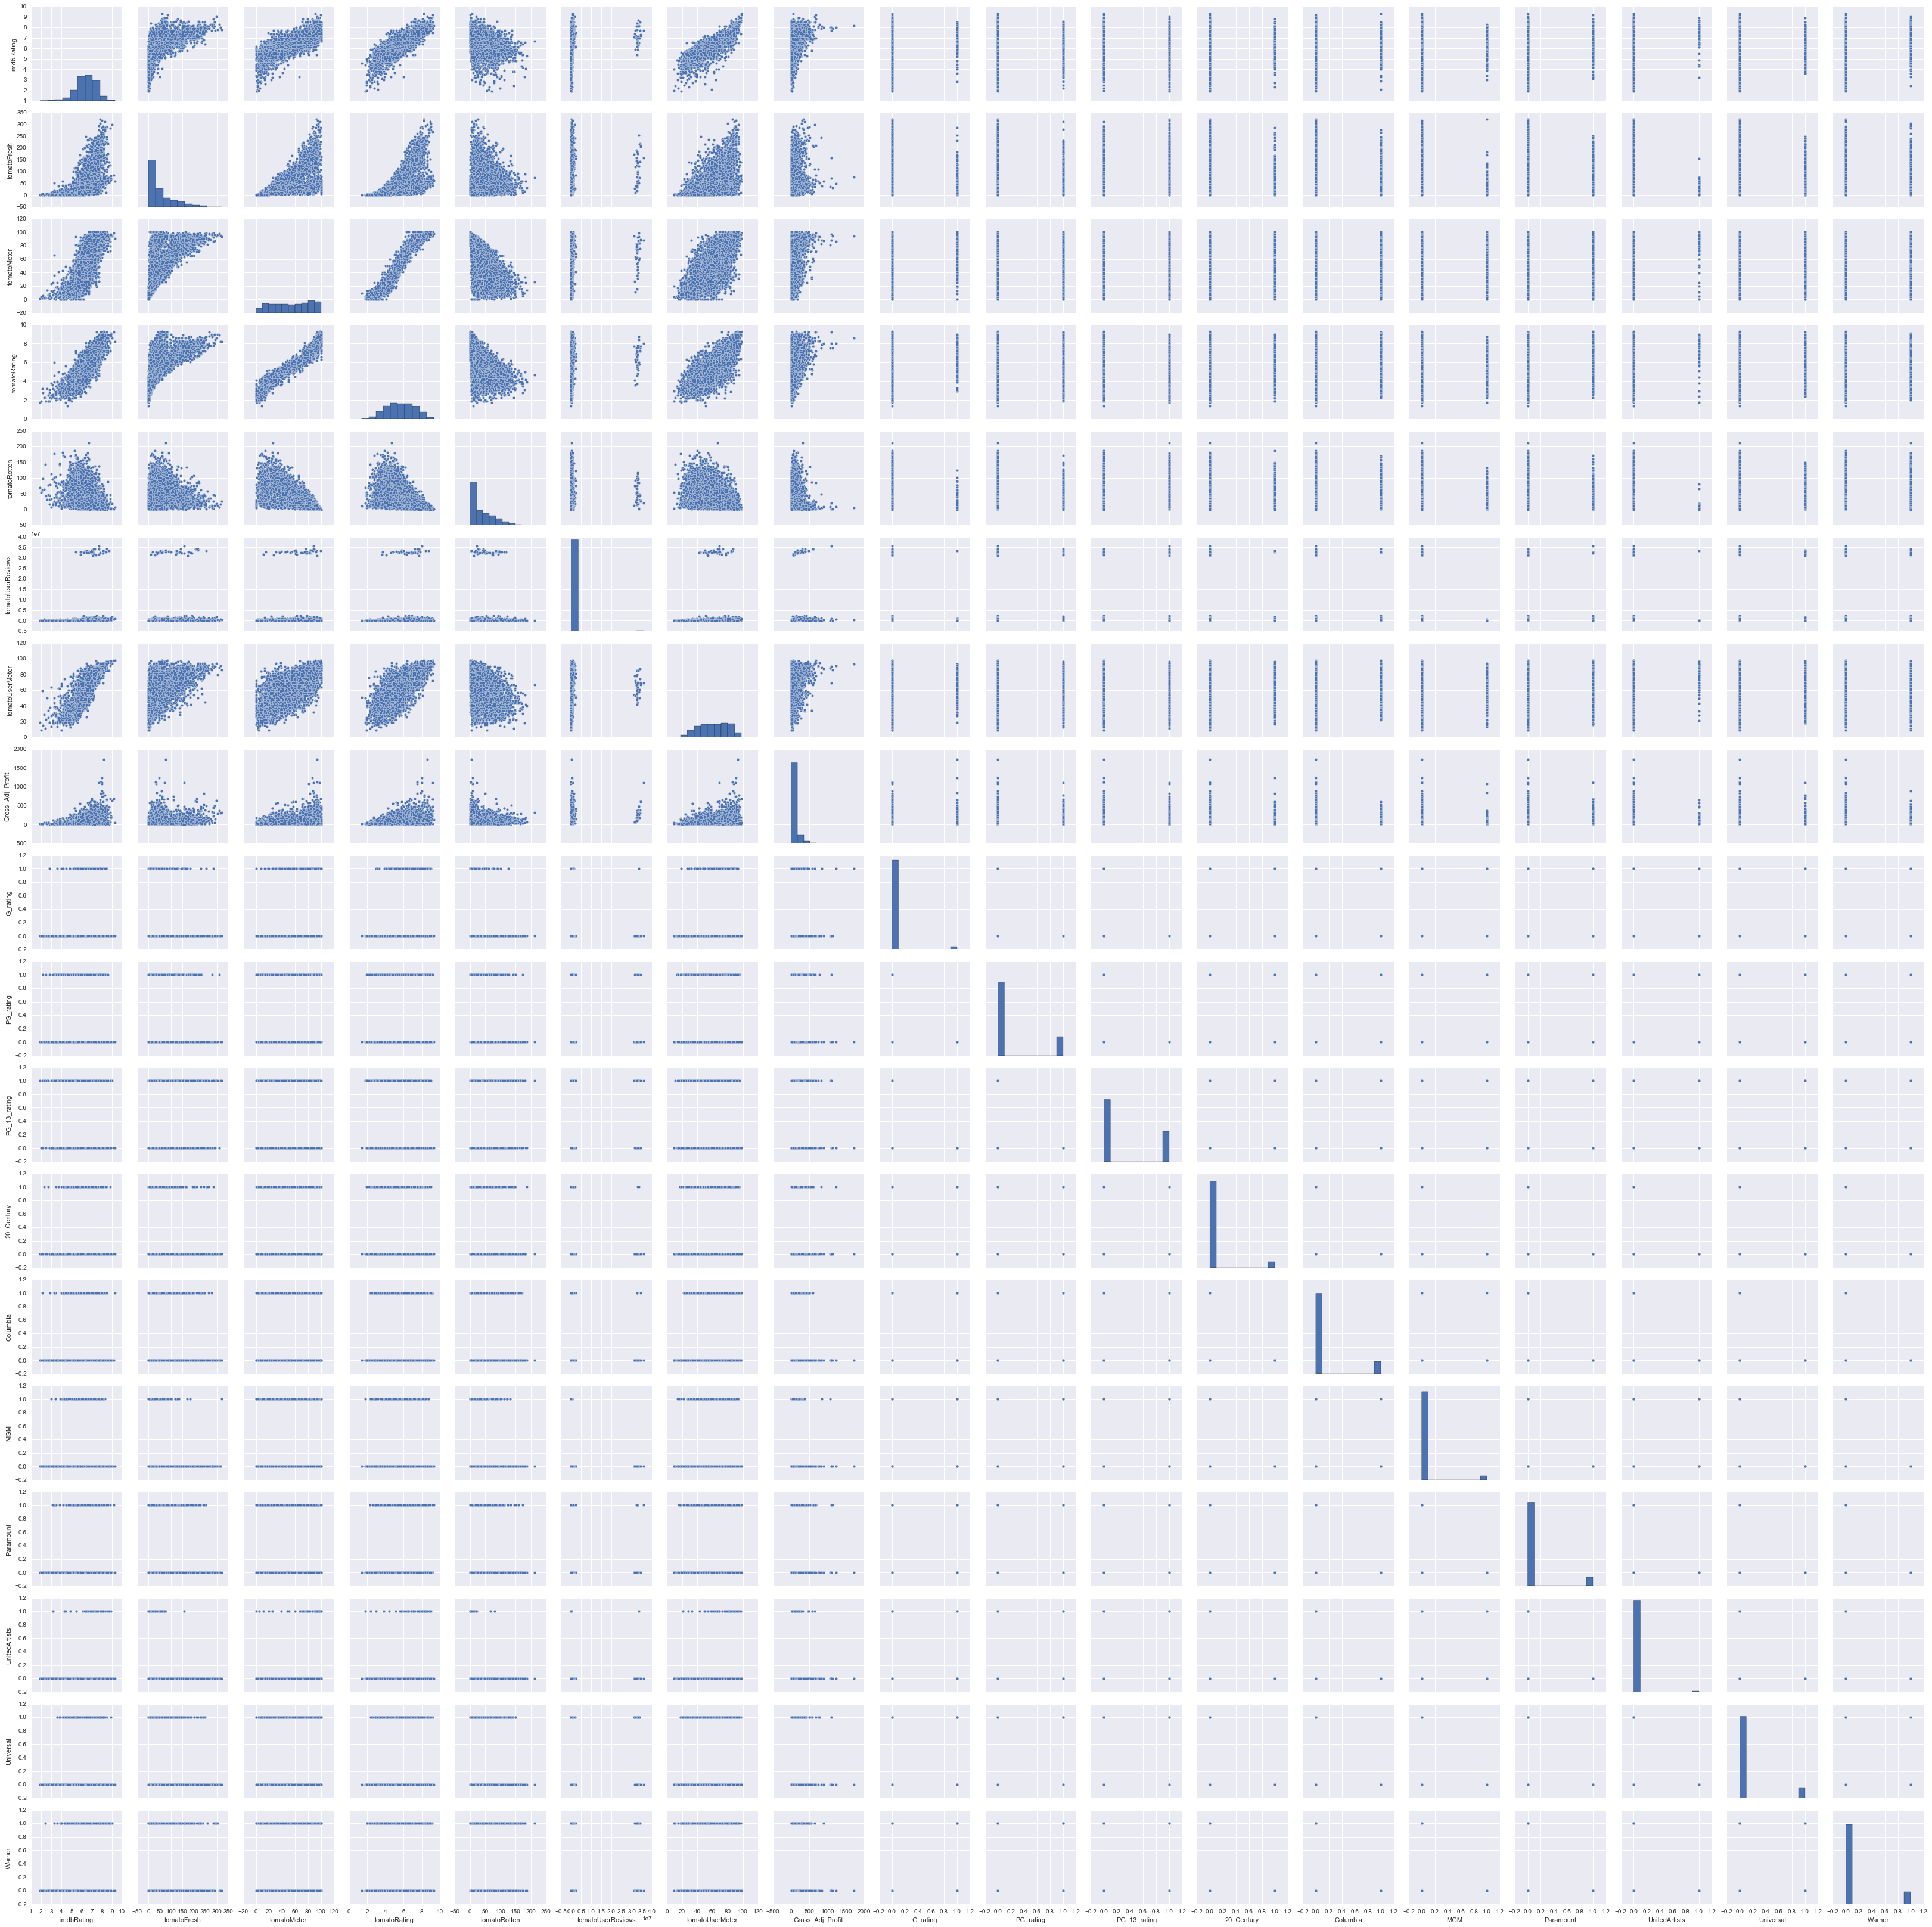

In [12]:
sns.pairplot(df2)

# StatsModels

In [15]:
X = df2.drop(['Gross_Adj_Profit', 'Rated', 'Production'], axis = 1)
y = df2['Gross_Adj_Profit']
X = sm.add_constant(X)
lmorig = sm.OLS(y, X)

In [16]:
fitorig = lmorig.fit()
fitorig.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Gross_Adj_Profit   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     51.93
Date:                Thu, 06 Oct 2016   Prob (F-statistic):          1.66e-158
Time:                        14:40:41   Log-Likelihood:                -23559.
No. Observations:                3918   AIC:                         4.715e+04
Df Residuals:                    3900   BIC:                         4.727e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const              -136.7258     17.147     -7.974      0.000      -170.344  -103.108
imdbRating            7.1742      3.961      1.811      0.070        -0.592    14.941
tomatoFresh           0.0015      0.040      0.037      0.971        -0.077     0.080
tomatoMeter          -0.6392      0.225     -2.838      0.005        -1.081    -0.198
tomatoRating         24.1931      4.493      5.385      0.000        15.385    33.001
tomatoRotten          0.1007      0.060      1.680      0.093        -0.017     0.218
tomatoUserReviews  5.824e-06   4.93e-07     11.801      0.000      4.86e-06  6.79e-06
tomatoUserMeter       0.5781      0.167      3.466      0.001         0.251     0.905
G_rating             79.7874      9.179      8.692      0.000        61.791    97.784
PG_rating            38.0286      4.341      8.761      0.000        29.518    46.539
PG_13_rating         18.0817      3.851      4.696      0.000        10.532    25.631
20_Century           34.1430      6.943      4.918      0.000        20.531    47.755
Columbia             16.1226      5.031      3.204      0.001         6.258    25.987
MGM                  10.5271      7.876      1.337      0.181        -4.914    25.968
Paramount            41.7297      5.754      7.252      0.000        30.448    53.011
UnitedArtists        78.3856     15.634      5.014      0.000        47.734   109.037
Universal            26.6138      5.324      4.999      0.000        16.176    37.052
Warner               30.2902      4.987      6.074      0.000        20.513    40.067
==============================================================================
Omnibus:                     3330.041   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           159836.092
Skew:                           3.787   Prob(JB):                         0.00
Kurtosis:                      33.360   Cond. No.                     3.65e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.65e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# SKLearn

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [18]:
modelfit = LinearRegression()
modelfit.fit(X_train, y_train)
modelfit.score(X_test, y_test)

0.17914459407615257

In [19]:
model2 = RidgeCV(alphas = (0.1, 1, 10, 100, 1000), cv = 10)
model2.fit(X_train, y_train)
print model2.score(X_test, y_test)
print model2.alpha_
print model2.coef_

0.182001247694
10
[  0.00000000e+00   1.04031878e+01  -3.13700532e-02  -7.92260873e-01
   2.66036269e+01   1.29555151e-01   5.83765796e-06   5.34981613e-01
   8.54020918e+01   3.94951122e+01   1.62179774e+01   3.56114217e+01
   1.46674645e+01   1.30936419e+01   4.03295506e+01   4.00791183e+01
   2.54217293e+01   2.83019853e+01]


# Model1 - Add Log

In [20]:
df2['log_tomUserRev'] = df2['tomatoUserReviews'].map(lambda x: np.log(x))

In [21]:
X = df2.drop(['Gross_Adj_Profit', 'tomatoUserReviews', 'Rated', 'Production'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [22]:
model1 = RidgeCV(alphas = (0.1, 1, 10, 100, 1000), cv = 10)
model1.fit(X_train, y_train)
print model1.score(X_test, y_test)

0.345285407278


# Model2 - ElasticNet

In [23]:
df2.head()

,imdbRating,tomatoFresh,tomatoMeter,tomatoRating,tomatoRotten,tomatoUserReviews,tomatoUserMeter,Rated,Production,Gross_Adj_Profit,...,PG_rating,PG_13_rating,20_Century,Columbia,MGM,Paramount,UnitedArtists,Universal,Warner,log_tomUserRev
0,6.0,15.0,71.0,6.4,6.0,14613.0,54.0,R,Waner Bros.,258.3009,...,0,0,0,0,0,0,0,0,0,9.589667
1,4.9,21.0,11.0,3.9,170.0,121303.0,36.0,PG-13,Sony Pictures,62.5443,...,0,1,0,1,0,0,0,0,0,11.706047
2,7.3,89.0,68.0,6.2,41.0,32088.0,81.0,PG,Walt Disney Pictures,58.0703,...,1,0,0,0,0,0,0,0,0,10.376237
3,7.2,44.0,98.0,8.1,1.0,708348.0,75.0,G,Buena Vista,487.1189,...,0,0,0,0,0,0,0,0,0,13.470691
4,4.8,28.0,31.0,4.4,62.0,406385.0,32.0,G,Buena Vista Pictures,106.6515,...,0,0,0,0,0,0,0,0,0,12.915056


In [24]:
model2 = ElasticNetCV(cv = 10)
model2.fit(X_train, y_train)
print model2.score(X_test, y_test)

0.303699211404


# Model3 - Lasso

In [25]:
model3 = LassoCV(cv = 10)
model3.fit(X_train, y_train)
print model3.score(X_test, y_test)

0.34854598159


# Model4 - Ridge

In [26]:
model4 = RidgeCV(cv = 10)
model4.fit(X_train, y_train)
print model4.score(X_test, y_test)

0.345285407278


# Model5 - LinReg

In [27]:
model5 = LinearRegression()
model5.fit(X_train, y_train)
print model5.score(X_test, y_test)

0.343175592772


# Model6 - Random Forest

In [31]:
model6 = RandomForestRegressor(n_estimators = 10, max_features = 3,
                                min_samples_leaf = 5, n_jobs=4, random_state = 4)
model6.fit(X_train,y_train)
print model6.score(X_test, y_test)
#pred_vals_rf1 = rfmodel1.predict(X_test)

0.380427345806


In [33]:
model6 = RandomForestRegressor(n_estimators = 1000, max_features = 6,
                                min_samples_leaf = 5, n_jobs=4, random_state = 4)
model6.fit(X_train,y_train)
print model6.score(X_test, y_test)

0.469382320383


# Model7 - GradientBoosting

In [34]:
model7 = GradientBoostingRegressor(n_estimators = 100, 
                                     learning_rate = .1,
                                    max_depth = 4)
model7.fit(X_train, y_train)
print model7.score(X_test, y_test)

0.420819738393


67.6684149258


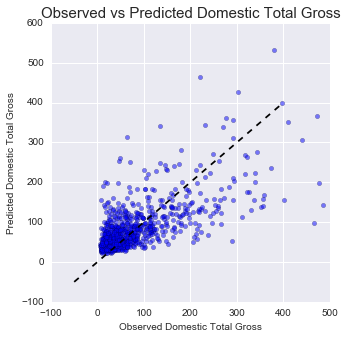

In [96]:
y_predict = model6.predict(X_test)
RMSE_lr = np.sqrt(np.sum((y_predict - y_test)**2)/len(y_test))
print RMSE_lr

plt.figure(figsize = (5,5))
plt.xlim(-100, 500)
line = np.linspace(-50, 400, 200)
plt.scatter(y_test, y_predict, alpha = 0.5)
plt.xlabel("Observed Domestic Total Gross", fontsize = 10)
plt.ylabel("Predicted Domestic Total Gross", fontsize = 10)
plt.title("Observed vs Predicted Domestic Total Gross", fontsize = 15)
plt.plot(line, line, 'k--')

Theaters must pays fees to the movie studios for choosing to show their movies. In doing so, they must decide which movies are the best ones to show to maximize their returns. Many times, it is difficult to choose which movies to show; therefore, it would be extremely advantageous to be able to predict the amount of revenue a certain movie would bring in early on. The ratings of a movie, from sources such as IMDB and Rotten Tomatoes, could be great predictors. Therefore, domestic total gross (inflated to 2016) was scraped from the top 4000 movies of all time, along with their ratings, in order to measure this phenomenon. The original R squared value, using a linear regression, returned a value of 0.13. Testing the data using the log of one of the features, the number of Rotten Tomatoes reviews, generated a higher R squared of 0.24. Testing it with the Lasso and Elastic Net did not significantly improve the R squared value.

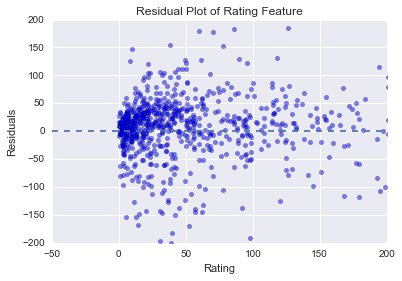

In [82]:
residuals = y_predict - y_test
y = np.arange(0,200)
x = np.linspace(-50,200)
plt.plot(x, x*0, "--")
plt.xlim(-50, 200)
plt.ylim(-200,200)
plt.xlabel("Rating")
plt.ylabel("Residuals")
plt.title('Residual Plot of Rating Feature')
plt.scatter(X_test.iloc[:,1], residuals, alpha = 0.5);